In this Python notebook, we will conduct an analysis of the NHTSA recall dataset available at https://www.nhtsa.gov/nhtsa-datasets-and-apis. This dataset provides comprehensive information on automotive recalls in the United States from 1963 until the present day. Our goal is to examine the total number of recalls and the corresponding number of potentially affected vehicles for each year leading up to the start of 2023.

To begin, we take a look at the structure of our dataset. Below, you will find an overview of its contents. We use this data to generate a graphical representation illustrating the growth of recalls in the United States.

In [1]:
import pandas as pd
df = pd.read_csv('./data/Recalls_Data.csv')
df.head()

,Report Received Date,NHTSA ID,Recall Link,Manufacturer,Subject,Component,Mfr Campaign Number,Recall Type,Potentially Affected,Recall Description,Consequence Summary,Corrective Action,Park Outside Advisory,Do Not Drive Advisory
0,05/25/2023,23V369000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Jaguar Land Rover North America, LLC",High-Voltage Battery May Overheat,ELECTRICAL SYSTEM,H441,Vehicle,6367.0,"Jaguar Land Rover North America, LLC (Jaguar) ...",The high-voltage battery overheating increases...,The battery energy control module software wil...,No,No
1,05/24/2023,23V364000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Grand Design RV, LLC",Missing Emergency Exit Window,STRUCTURE,910035,Vehicle,232.0,"Grand Design RV, LLC (Grand Design) is recalli...",A missing emergency exit window could prevent ...,Dealers will replace the window with an emerge...,No,No
2,05/24/2023,23V363000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"ST Engineering Hackney, Inc",Suspension Pivot Bolt Improperly Tightened,SUSPENSION,NR (Not Reported),Vehicle,120.0,"ST Engineering Hackney, Inc. (STE Hackney) is ...","Improperly tightened pivot bolts may fail, cau...","Dealers will inspect, and if necessary, tighte...",No,No
3,05/22/2023,23V362000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Nissan North America, Inc.",Corrosion in Brake Line May Cause Brake Fluid ...,"SERVICE BRAKES, HYDRAULIC",PC976,Vehicle,758.0,"Nissan North America, Inc. (Nissan) is recalli...",A brake fluid leak can reduce braking performa...,Dealers will inspect and replace the right-han...,No,No
4,05/19/2023,23V360000,Go to Recall (https://www.nhtsa.gov/recalls?nh...,"Mercedes-Benz USA, LLC",Electronic Stability Control Software Error,ELECTRONIC STABILITY CONTROL,NR (Not Reported),Vehicle,7558.0,"Mercedes-Benz USA, LLC (MBUSA) is recalling ce...","Disabled vehicle dynamics control systems, inc...",Dealers will update the ESP control unit softw...,No,No


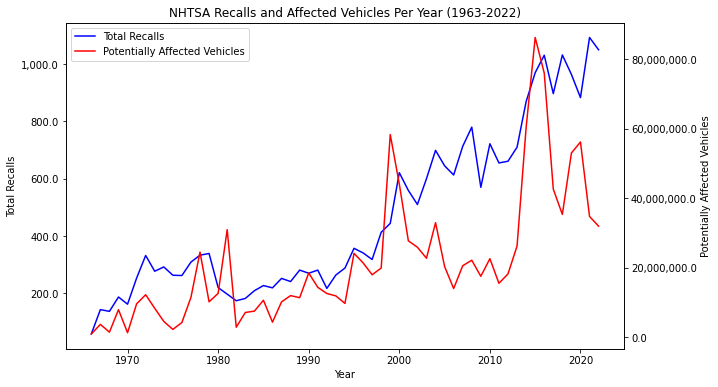

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter out data from 2023
df_filtered = df[df['Report Received Date'].str[-4:] != '2023']

df_filtered = df_filtered.copy()
df_filtered['Report Received Date'] = pd.to_datetime(df_filtered['Report Received Date'], format='%m/%d/%Y')
df_filtered['Year'] = df_filtered['Report Received Date'].dt.year

# Group data by year and calculate totals
grouped_data = df_filtered.groupby('Year').agg({'NHTSA ID': 'count', 'Potentially Affected': 'sum'})
grouped_data.reset_index(inplace=True)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot total recalls
ax1.plot(grouped_data['Year'], grouped_data['NHTSA ID'], label='Total Recalls', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Recalls')
ax1.tick_params(axis='y')

# Create second axis for potentially affected vehicles
ax2 = ax1.twinx()
ax2.plot(grouped_data['Year'], grouped_data['Potentially Affected'], label='Potentially Affected Vehicles', color='red')
ax2.set_ylabel('Potentially Affected Vehicles')
ax2.tick_params(axis='y')

# Set title
ax1.set_title('NHTSA Recalls and Affected Vehicles Per Year (1963-2022)')

# Show legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

# Format y-axis labels with commas
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,}".format(x)))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,}".format(x)))